In [1]:
from data import *
from training import *

import torch

In [9]:
num_points = 1000
num_dims = 3
x = torch.rand(num_points, num_dims)
y = torch.cat([(torch.sin(x[:, 0]*3.14 + x[:, 1]**2 * 3.14) * torch.cos(x[:, 2]))[:, None], 
               (x[:, 0]**2 - x[:, 1])[:, None], 
               (x[:, 2] - x[:, 1] * x[:, 0])[:, None]], dim=1)
print(y.shape)

torch.Size([1000, 3])


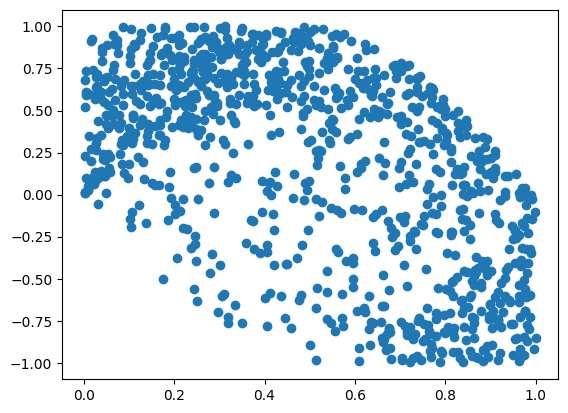

In [10]:
datahandler = DataHandler(x, y)
datahandler.show_data(style='scatter')
train_loader, val_loader = datahandler.make_dataloaders(batch_size=64)

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()
criterion = mse_criterion()
trainer = RegressionTrainer(model, train_loader, val_loader, criterion=criterion)

No optimizer provided, using Adam


Beginning training for 10 epochs

Epoch 1 	| Train Loss: 1.450e-02 	| Val Loss: 1.430e-02
Epoch 2 	| Train Loss: 1.358e-02 	| Val Loss: 1.420e-02
Epoch 3 	| Train Loss: 1.372e-02 	| Val Loss: 1.535e-02
Epoch 4 	| Train Loss: 1.353e-02 	| Val Loss: 1.384e-02
Epoch 5 	| Train Loss: 1.404e-02 	| Val Loss: 1.983e-02
Epoch 6 	| Train Loss: 1.358e-02 	| Val Loss: 1.419e-02
Epoch 7 	| Train Loss: 1.314e-02 	| Val Loss: 1.422e-02
Epoch 8 	| Train Loss: 1.319e-02 	| Val Loss: 1.411e-02
Epoch 9 	| Train Loss: 1.304e-02 	| Val Loss: 1.466e-02
Epoch 10 	| Train Loss: 1.272e-02 	| Val Loss: 2.011e-02

Training complete. Final train loss: 1.272e-02 | Final val loss: 2.011e-02


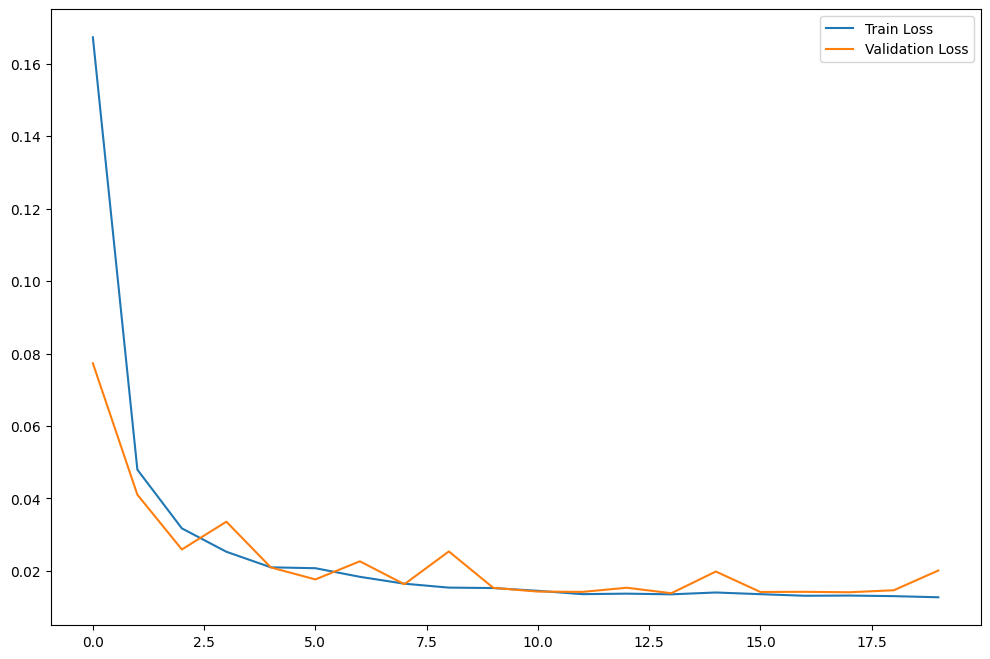

In [15]:
train, val = trainer.run_training(10, 1e-3, print_progress=True, show_loss_plot=True)

In [16]:
best_model = trainer.get_best_model()

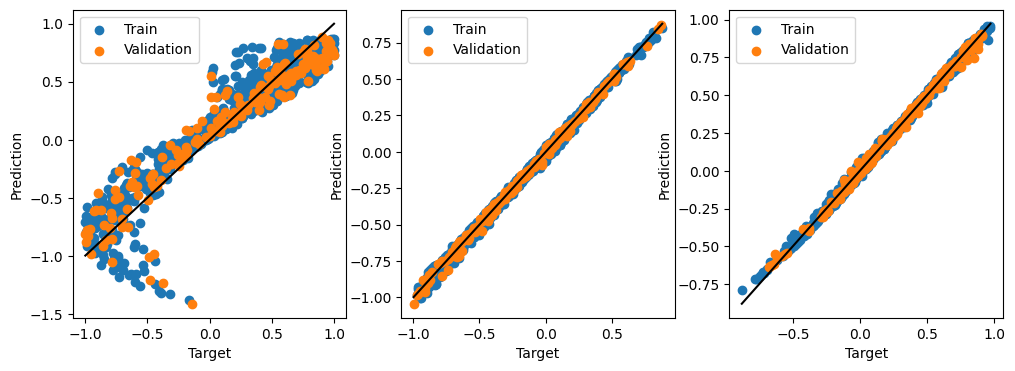

In [17]:
trainer.show_model_performance()